In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [2]:
df = pd.read_csv(r'C:\Users\GH0ST\Downloads\customer_booking.csv', encoding='latin1')

In [3]:
result=df.value_counts()
with pd.option_context('display.max_rows', 1000):
    print(result)

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  flight_hour  flight_day  route   booking_origin  wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  flight_duration  booking_complete
3               Mobile         RoundTrip  37             18              4            Tue         HNDTRZ  Japan           1                    0                     0                      7.57             0                   11
1               Mobile         RoundTrip  199            6               18           Mon         IKASZX  China           0                    0                     0                      8.15             0                    9
2               Mobile         RoundTrip  29             6               6            Thu         DPSPVG  China           1                    1                     1                      5.33             0                    8
1               Mobile         RoundTrip  98             36              13           Mon     

In [4]:
df_final = df

In [5]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [6]:
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)
#store the label for supervised learning
label = df['booking_complete']
df_final = df_final.drop('booking_complete', axis=1)
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,Sat,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,Sat,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,Wed,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,Sat,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,Wed,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,Sat,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,Sun,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,Sat,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,Mon,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


In [7]:
# Sample DataFrame with a column containing days of the week
data = {'flight_day': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

# Define a dictionary to map days to numerical values
day_to_num = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

# Use the apply method to map the values in the 'DayOfWeek' column to numerical values
df_final['flight_day'] = df_final['flight_day'].apply(lambda x: day_to_num[x])

# Print the DataFrame with the new numerical values
df_final.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0


In [8]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)
# add the labels back to the dataframe
scaled_df['label']  = label
scaled_df


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


# Correlation Matrix


<Axes: >

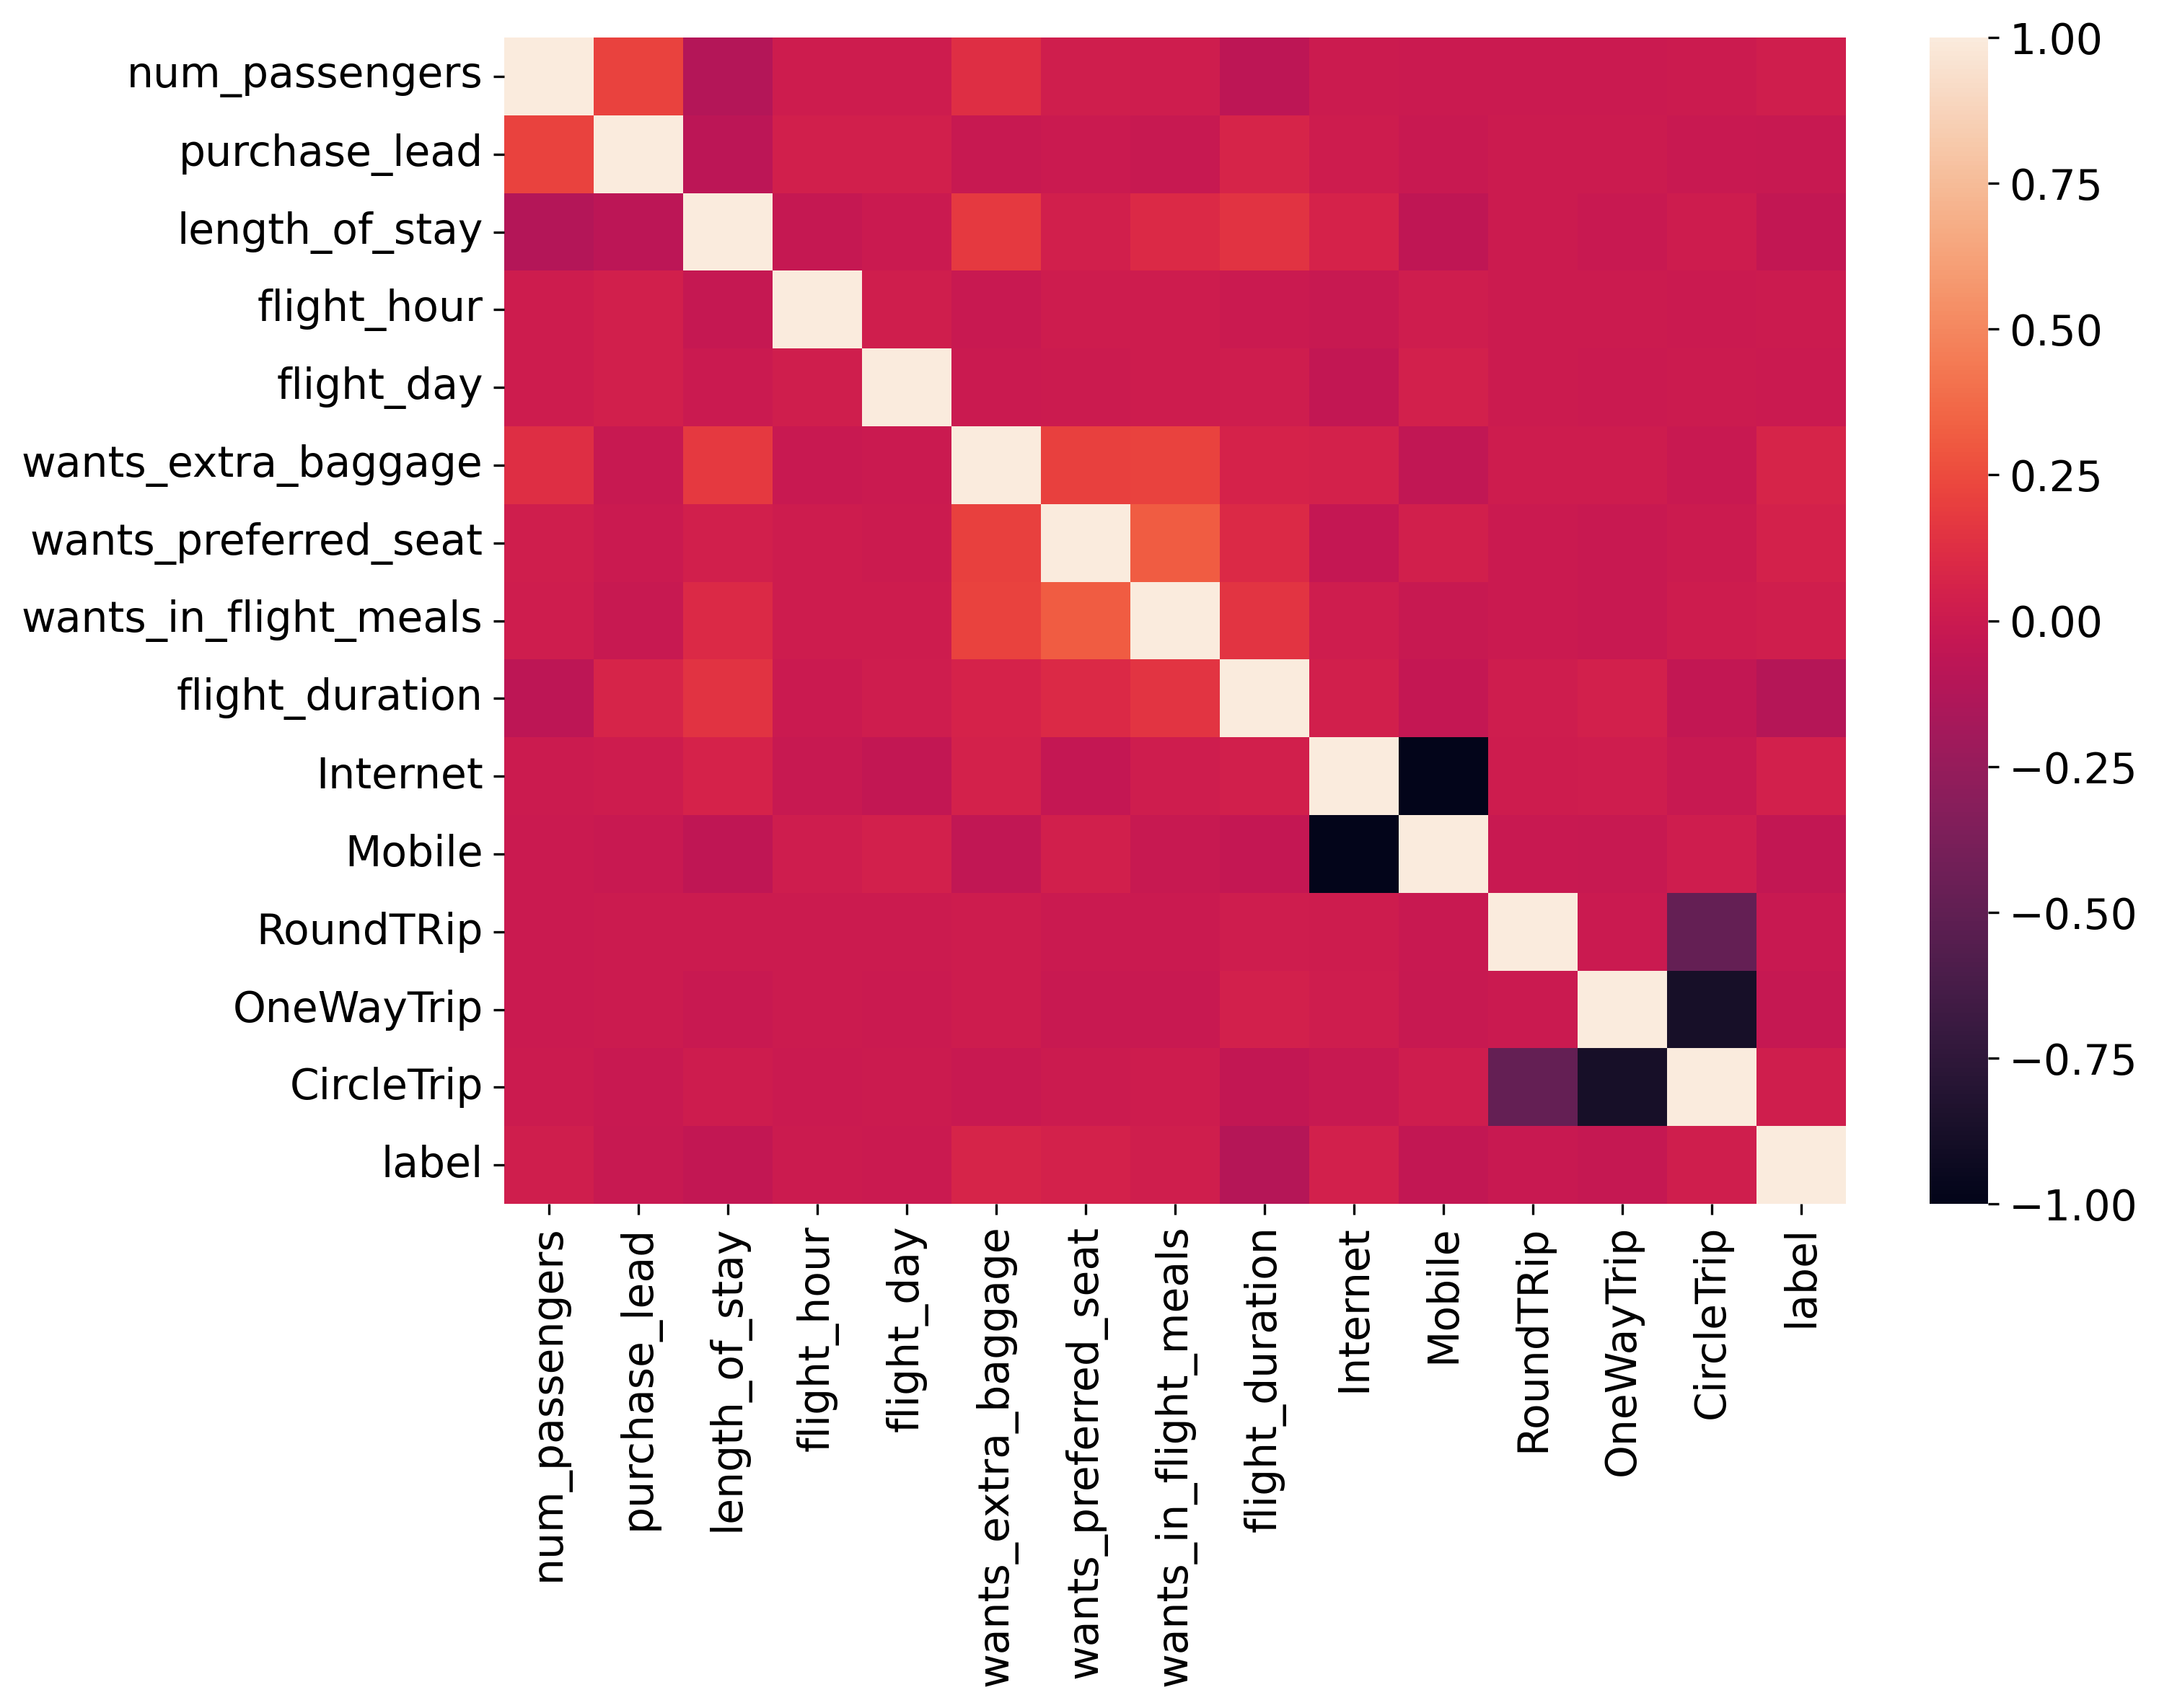

In [9]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7), dpi=300)

#plot the heatmap
sns.heatmap(corr)

# Splitting Train and Test Data

In [10]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)


In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

# Random Forest Classifier


In [12]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)



# Checking Training Accuracy

In [13]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")


Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


In [18]:
scaled_df.label.value_counts()

#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,4.321659,-0.419461,-0.561996,-0.381764,1.096754,0.703747,1.538654,1.158082,-0.439297,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
1,-0.579559,1.194682,-0.591506,0.172497,0.093127,0.703747,-0.649919,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
2,0.400684,0.299164,-0.502977,0.357251,-0.408687,0.703747,-0.649919,1.158082,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
3,-0.579559,-0.563186,-0.621016,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
4,-0.579559,-0.530019,-0.561996,1.281021,-0.910501,0.703747,-0.649919,-0.863497,-1.107368,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15473,0.400684,1.261016,-0.561996,0.911513,-0.910501,-1.420965,-0.649919,-0.863497,-0.185430,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15474,-0.579559,-0.861692,-0.089844,-0.751272,-1.412314,0.703747,-0.649919,-0.863497,1.037139,0.355785,-0.355785,-0.048222,-0.08832,0.100808,1
15475,-0.579559,-0.740079,0.116723,-0.012257,0.594940,0.703747,1.538654,1.158082,0.870121,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0
15476,-0.579559,-0.916971,-0.591506,1.465775,1.096754,0.703747,-0.649919,-0.863497,-0.185430,0.355785,-0.355785,-0.048222,-0.08832,0.100808,0


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
sorted_idx = clf_rf.feature_importances_.argsort()
feature_importance = clf_rf.feature_importances_[sorted_idx]
feature_names = scaled_df.iloc[:,:-1].columns[sorted_idx]

# Define custom colors for the bars
colors = ['skyblue' if imp < 0.05 else 'lightcoral' for imp in feature_importance]

# Create a figure with customized size and DPI
plt.figure(figsize=(10, 8), dpi=900)

# Create the bar chart with custom colors
bars = plt.barh(feature_names, feature_importance, color=colors)

# Add labels and title
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

# Add a horizontal line at y=0
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8)

# Annotate the bars with the importance values
for bar, imp in zip(bars, feature_importance):
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{imp:.3f}',
        va='center',
        fontsize=8,
        color='black'
    )

# Display the plot
plt.tight_layout()
plt.show()


## XGB classifier with all features

In [29]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)
     

In [30]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X
     

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

X_train,X_val,y_train,y_val = dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  84.98
AUC score:  0.5577796717361984


In [38]:

X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))


ACCURACY:  85.09
AUC score:  0.5577796717361984
